In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## GradeClass:
0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

In [4]:
df = pd.read_csv('C:/Users/Mojtabaei/Downloads/Student_performance_data.csv')
df.head(15)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [5]:
cdf = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']]
cdf.describe()

,Age,StudyTimeWeekly,Absences,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,1.906186,2.983696
std,1.123798,5.652774,8.467417,0.915156,1.233908
min,15.000000,0.001057,0.000000,0.000000,0.000000
25%,15.000000,5.043079,7.000000,1.174803,2.000000
50%,16.000000,9.705363,15.000000,1.893393,4.000000
75%,17.000000,14.408410,22.000000,2.622216,4.000000
max,18.000000,19.978094,29.000000,4.000000,4.000000


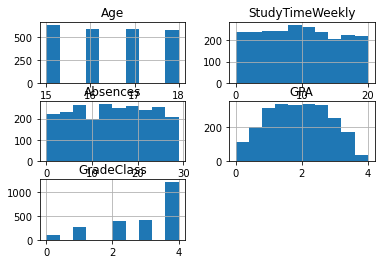

In [6]:
cdf.hist()
plt.show()

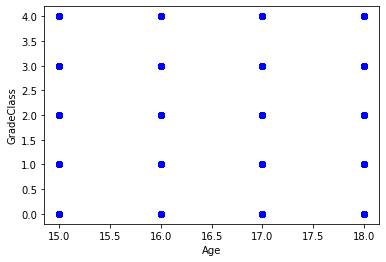

In [7]:
plt.scatter(cdf.Age, cdf.GradeClass, color = 'blue')
plt.xlabel('Age')
plt.ylabel('GradeClass')
plt.show()

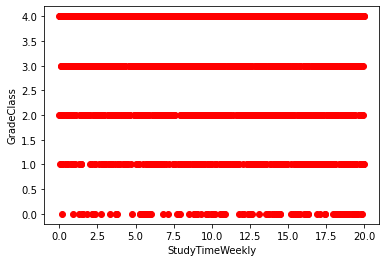

In [8]:
plt.scatter(cdf.StudyTimeWeekly, cdf.GradeClass, color = 'red')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GradeClass')
plt.show()

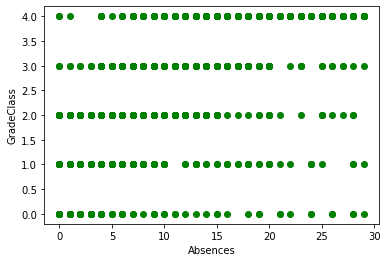

In [11]:
plt.scatter(cdf.Absences, cdf.GradeClass, color = 'green')
plt.xlabel('Absences')
plt.ylabel('GradeClass')
plt.show()

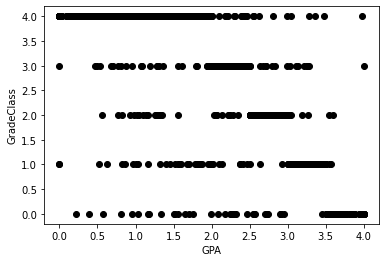

In [15]:
plt.scatter(cdf.GPA, cdf.GradeClass, color = 'black')
plt.xlabel('GPA')
plt.ylabel('GradeClass')
plt.show()

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']])
train_y = np.asanyarray(train[['GradeClass']])
regr.fit(train_x, train_y)
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[-0.01039095 -0.00425715  0.01107789 -0.94656359]]
Intercept:  [4.83368228]


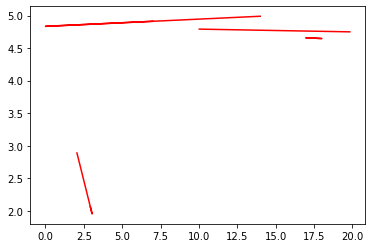

In [33]:
plt.plot(train_x[0:3],+regr.coef_[0:3]*train_x[0:3]+  regr.intercept_ , 'r-')
plt.show()

In [36]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']])
test_y = np.asanyarray(test[['GradeClass']])
test_y_ = regr.predict(test_x)
print('R2 score: %.2f '% r2_score(test_y, test_y_))

R2 score: 0.64 
